In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_97692/1155928800.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df1 = pd.read_csv('XAU_USD_Historical_Data_2000_2010.csv', parse_dates=[0])
df2 = pd.read_csv('XAU_USD_Historical_Data_2010_2023.csv', parse_dates=[0])

In [3]:
dfs = [df2, df1]
gold_usd = pd.concat(dfs)

In [4]:
gold_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [5]:
gold_usd.Date.min()

Timestamp('2000-01-03 00:00:00')

In [6]:
gold_usd.Date.max()

Timestamp('2023-09-07 00:00:00')

In [7]:
gold_usd.index = gold_usd.Date

In [8]:
gold_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2010-01-01,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [9]:
gold_usd.drop('Date', inplace=True, axis=1)

In [10]:
gold_usd.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [11]:
gold_usd.describe()

,Vol.
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [12]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   object 
 1   Open      6168 non-null   object 
 2   High      6168 non-null   object 
 3   Low       6168 non-null   object 
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(1), object(5)
memory usage: 337.3+ KB


In [13]:
type(gold_usd.Price[0])

str

In [14]:
for col in ['Price', 'Open', 'High', 'Low']:
    gold_usd[col] = gold_usd[col].map(lambda row : float(row.replace(',', '')))

In [15]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   float64
 1   Open      6168 non-null   float64
 2   High      6168 non-null   float64
 3   Low       6168 non-null   float64
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(5), object(1)
memory usage: 337.3+ KB


In [16]:
gold_usd['Change %'] = gold_usd['Change %'].map(lambda x: float(x.replace('%', '')))

In [17]:
gold_usd.drop('Vol.', inplace=True, axis=1)

In [18]:
gold_usd.head()

,Price,Open,High,Low,Change %
Date,,,,,
2010-01-01,1097.35,1097.25,1097.90,1097.05,0.10
2010-01-04,1120.40,1096.25,1123.80,1093.45,2.10
2010-01-05,1119.05,1121.30,1128.10,1115.25,-0.12
2010-01-06,1138.90,1118.40,1140.60,1116.00,1.77
2010-01-07,1132.30,1138.20,1139.15,1128.60,-0.58


In [19]:
gold_usd.index.is_monotonic_decreasing

False

In [20]:
gold_usd.index.is_monotonic_increasing

False

In [21]:
gold_usd = gold_usd.sort_index()

In [22]:
gold_usd.index.is_monotonic_increasing

True

In [23]:
def display_plot(data, title):
    data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

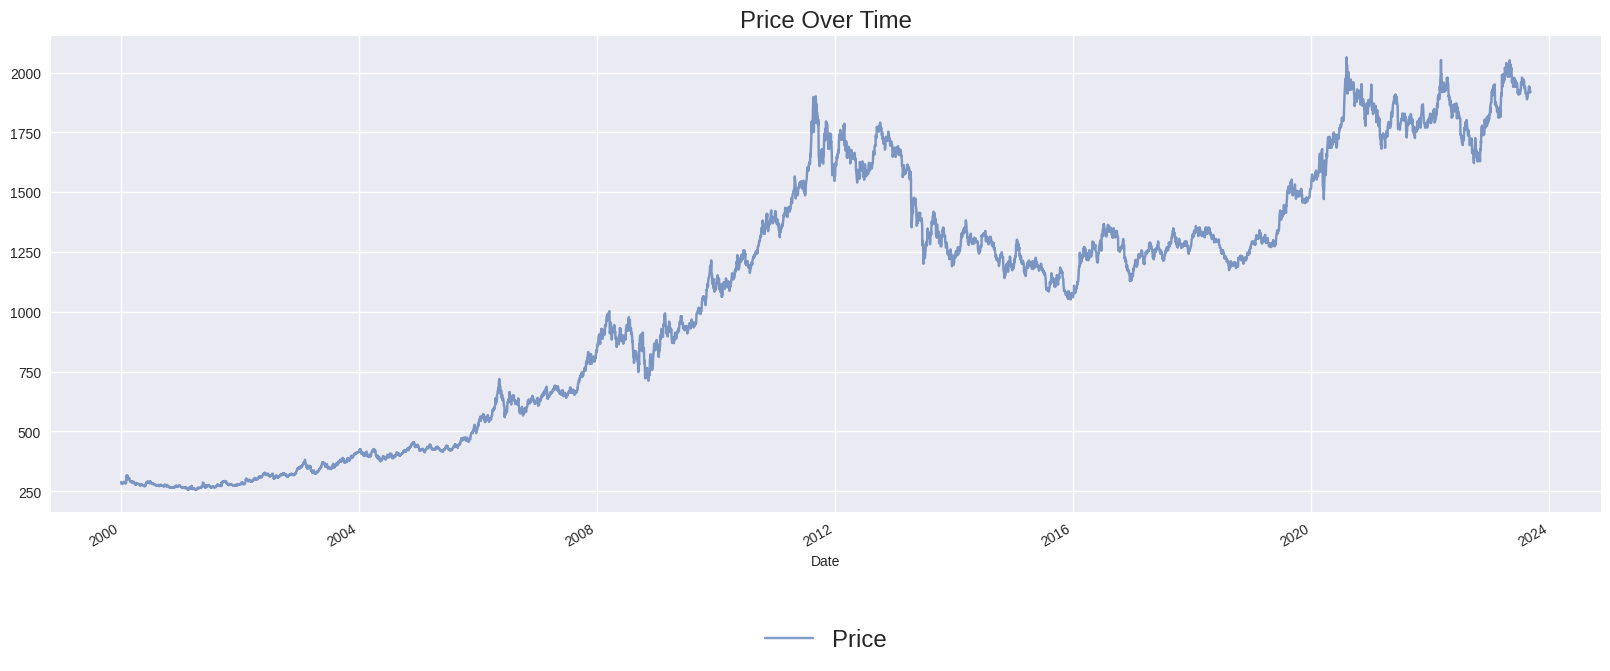

In [24]:
gold_price = gold_usd.Price
display_plot(gold_price, 'Price Over Time')

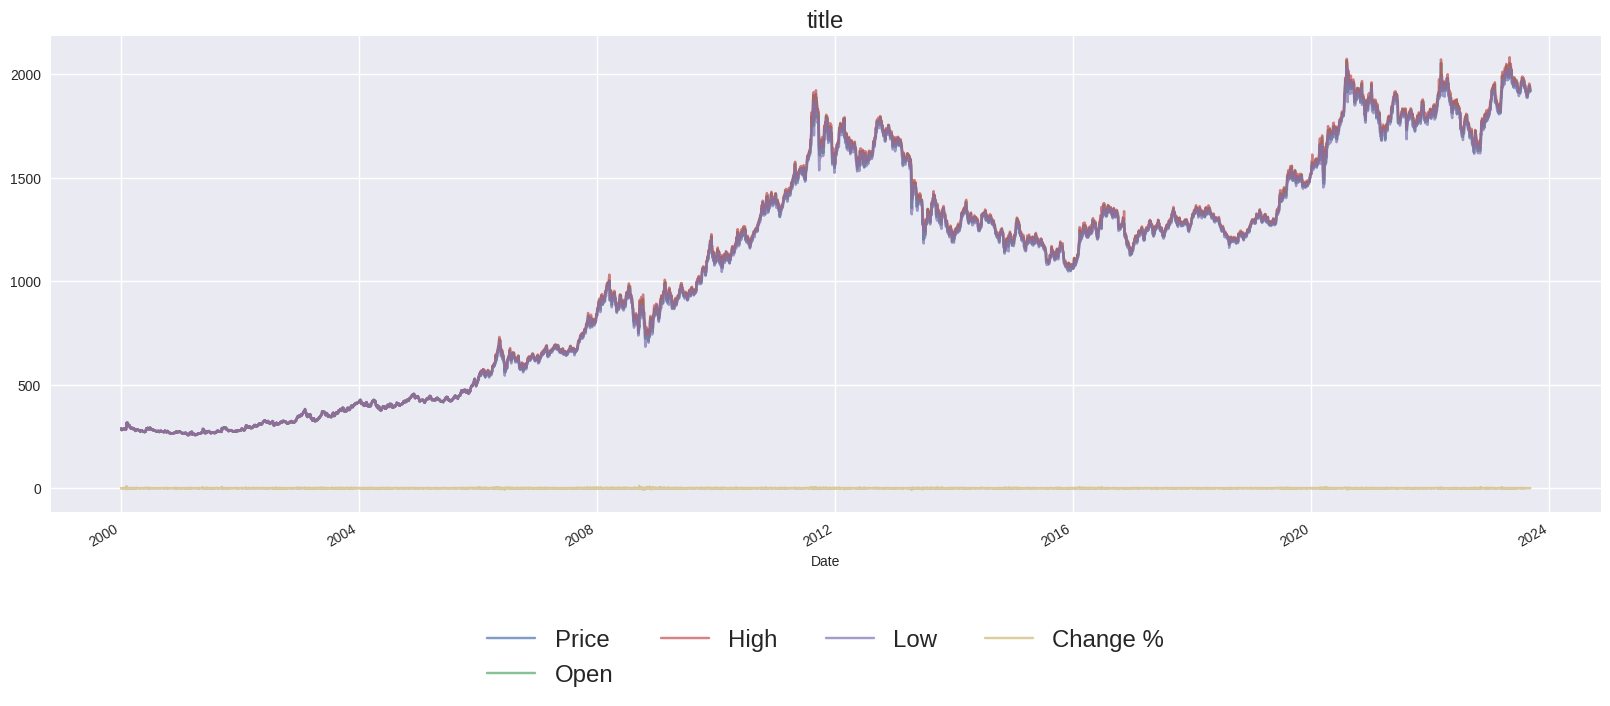

In [25]:
display_plot(gold_usd, 'title')

In [30]:
gold_usd['DayOfWeek'] = gold_usd.index.day_name()
gold_usd.head(10)

,Price,Open,High,Low,Change %,DayOfWeek
Date,,,,,,
2000-01-03,289.00,288.50,289.00,289.00,0.26,Monday
2000-01-04,282.45,288.75,282.45,282.45,-2.27,Tuesday
2000-01-05,281.00,281.50,281.00,281.00,-0.51,Wednesday
2000-01-06,281.23,280.12,281.23,281.23,0.08,Thursday
2000-01-07,281.75,281.15,281.75,281.75,0.18,Friday
2000-01-10,281.48,281.88,281.48,281.48,-0.10,Monday
2000-01-11,283.38,281.48,283.38,283.38,0.68,Tuesday
2000-01-12,282.48,283.27,282.48,282.48,-0.32,Wednesday
2000-01-13,284.25,282.60,284.25,284.25,0.63,Thursday


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
gold_usd.index.freq = 'd' 

ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [ ]:
decomposed = seasonal_decompose(gold_usd)

In [ ]:
error

In [ ]:
gold_usd_corr = gold_usd.corr()

In [ ]:
print(gold_usd_corr)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = ax.imshow(gold_usd_corr, cmap='coolwarm', interpolation='nearest')

cbar = plt.colorbar(heatmap)

ax.set_xticks(range(len(gold_usd_corr)))
ax.set_yticks(range(len(gold_usd_corr)))
ax.set_xticklabels(gold_usd_corr.columns, rotation=90)
ax.set_yticklabels(gold_usd_corr.columns)

ax.set_title('Gold-USD Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
gold_usd_scaled = standard_scaler.fit_transform(gold_usd)

In [ ]:
gold_usd_scaled = pd.DataFrame(gold_usd_scaled, index=gold_usd.index, columns=gold_usd.columns)

In [ ]:
gold_usd_scaled.head()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.99, random_state=42)
pca_components = pca.fit_transform(gold_usd_scaled)

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
pca.n_components_

In [ ]:
pca_components

In [ ]:
gold_usd_scaled

In [ ]:
gold_df = pd.DataFrame(pca_components, index=gold_usd.index, columns=['PCA1', 'PCA2'])
gold_df                                

In [ ]:
display_plot(gold_df.PCA1, 'PCA1 with time')

In [ ]:
# data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
gold_df['Rolling_mean_PCA2'] = gold_df.PCA2.rolling(100).mean()
gold_df['Rolling_mean_PCA1'] = gold_df.PCA1.rolling(100).mean()

In [ ]:
display_plot(gold_df, 'title')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(gold_df)

In [ ]:
display_plot(gold_df, 'title')

In [ ]:
def decomposed_graphs(decomposed_data, title):
    decomposed_data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

decomposed_graphs(decomposed.trend, "trend")
decomposed_graphs(decomposed.seasonal, "seasonality")
decomposed_graphs(decomposed.resid, "The remainder of the decomposition")